<a href="https://colab.research.google.com/github/BrainConnection/Dynamical_Decoupling_Project/blob/main/Dual%20Rail%20Erasure%20Qubit%20Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [1]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 21.5 MB/s eta 0:00:00


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit

# Hamiltonian Setting

In [68]:
omega_q1 = 2 * np.pi * 5.1*1000    # qubit frequency in units of GHz
omega_q2 = 2 * np.pi * 5.1*1000    # qubit frequency in units of GHz
omega_q3 = 2 * np.pi * 3.74*1000   # qubit frequency in units of GHz

g12 = 2 * np.pi * 0.0901*1000      # qubit coupling in units of GHz
g13 = 2 * np.pi * 0.0084*1000      # qubit coupling in units of GHz
g23 = 2 * np.pi * 0.0817*1000      # qubit coupling in units of GHz

gamma1_1 = 1/36
gamma1_2 = 1/14
gamma1_3 = 1/38

gammaphi_1 = 1/31 - 0.5*gamma1_1
gammaphi_2 = 1/1.29 - 0.5*gamma1_2
gammaphi_3 = 1/4.4 - 0.5*gamma1_3

state0L = (tensor(basis(2,0), basis(2,1), basis(2,0)) - tensor(basis(2,1), basis(2,0), basis(2,0)))/np.sqrt(2)
state1L = (tensor(basis(2,0), basis(2,1), basis(2,0)) + tensor(basis(2,1), basis(2,0), basis(2,0)))/np.sqrt(2)

state00 = tensor(basis(2,0), basis(2,0), basis(2,0))
state01 = tensor(basis(2,0), basis(2,1), basis(2,0))
state10 = tensor(basis(2,1), basis(2,0), basis(2,0))
state11 = tensor(basis(2,1), basis(2,1), basis(2,0))

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

proj00 = state00*state00.dag()
proj01 = state01*state01.dag()
proj10 = state10*state10.dag()
proj11 = state11*state11.dag()
proj0L = state0L*state0L.dag()
proj1L = state1L*state1L.dag()
projanc = tensor(qeye(2), qeye(2), sz)

op_list = [proj00, proj01, proj10, proj11, proj0L, proj1L, projanc]

H0 = -0.5*omega_q1*tensor(sz, qeye(2), qeye(2)) -0.5*omega_q2*tensor(qeye(2), sz, qeye(2)) -0.5*omega_q3*tensor(qeye(2), qeye(2), sz) + g12*(tensor(sp, sm, qeye(2)) + tensor(sm, sp, qeye(2))) + g23*(tensor(qeye(2), sp, sm) + tensor(qeye(2), sm, sp)) + g13*(tensor(sp, qeye(2), sm) + tensor(sm, qeye(2), sp))

# Idle Gate

Initial State : state1L

In [70]:
# Simulation T1 & T2 process

tlist = np.linspace(0, 100, 10000)

result0 = mesolve(
    [H0],
    state1L,
    tlist,
    c_ops = [np.sqrt(gamma1_1) * tensor(sm, qeye(2), qeye(2)), np.sqrt(gamma1_2) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gamma1_3) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gammaphi_1) * tensor(sz, qeye(2), qeye(2)), np.sqrt(gammaphi_2/2) * tensor(qeye(2), sz, qeye(2)), np.sqrt(gammaphi_3/2) * tensor(qeye(2), qeye(2), sz)],
    e_ops = op_list,
)

Text(0, 0.5, 'Probability')

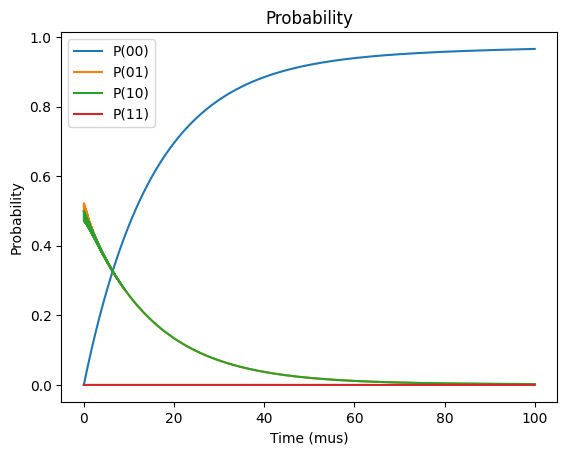

In [71]:
# Plot Results

plt.plot(tlist, result0.expect[0], label="P(00)")
plt.plot(tlist, result0.expect[1], label="P(01)")
plt.plot(tlist, result0.expect[2], label="P(10)")
plt.plot(tlist, result0.expect[3], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

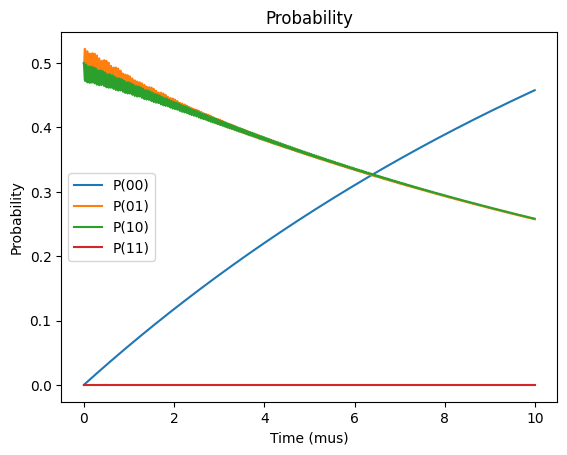

In [72]:
# Plot Results

plt.plot(tlist[:1000], result0.expect[0][:1000], label="P(00)")
plt.plot(tlist[:1000], result0.expect[1][:1000], label="P(01)")
plt.plot(tlist[:1000], result0.expect[2][:1000], label="P(10)")
plt.plot(tlist[:1000], result0.expect[3][:1000], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

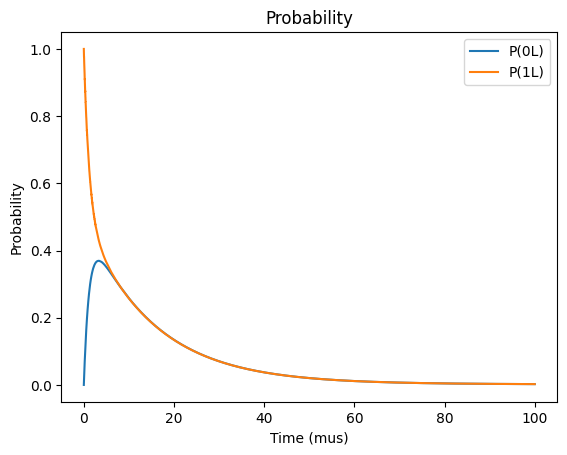

In [73]:
# Plot Results

plt.plot(tlist, result0.expect[4], label="P(0L)")
plt.plot(tlist, result0.expect[5], label="P(1L)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

In [74]:
# Simulation only T1 Process

tlist = np.linspace(0, 100, 10000)

result1 = mesolve(
    [H0],
    state1L,
    tlist,
    c_ops = [np.sqrt(gamma1_1) * tensor(sm, qeye(2), qeye(2)), np.sqrt(gamma1_2) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gamma1_3) * tensor(qeye(2), sm, qeye(2))],
    e_ops = op_list,
)

Text(0, 0.5, 'Probability')

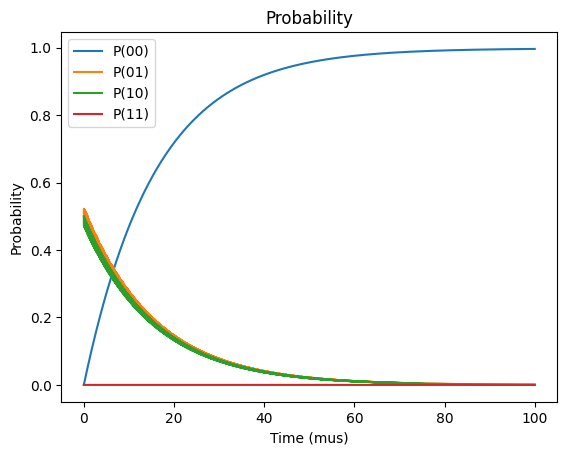

In [75]:
# Plot Results

plt.plot(tlist, result1.expect[0], label="P(00)")
plt.plot(tlist, result1.expect[1], label="P(01)")
plt.plot(tlist, result1.expect[2], label="P(10)")
plt.plot(tlist, result1.expect[3], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

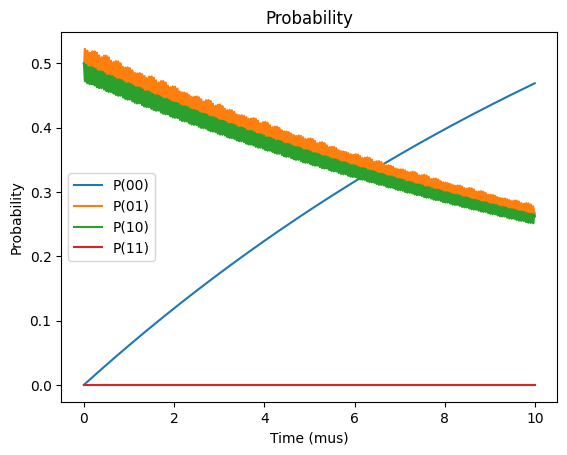

In [76]:
# Plot Results

plt.plot(tlist[:1000], result1.expect[0][:1000], label="P(00)")
plt.plot(tlist[:1000], result1.expect[1][:1000], label="P(01)")
plt.plot(tlist[:1000], result1.expect[2][:1000], label="P(10)")
plt.plot(tlist[:1000], result1.expect[3][:1000], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

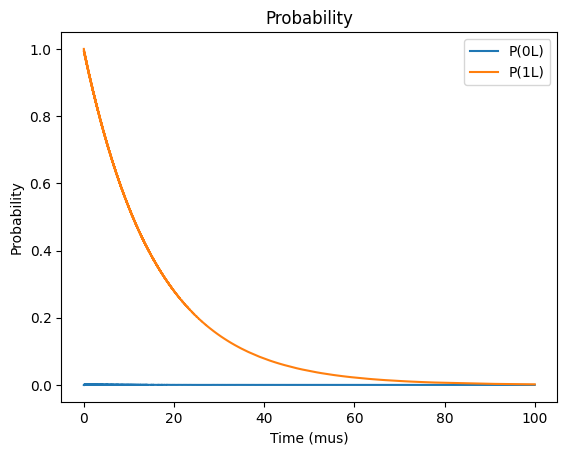

In [77]:
# Plot Results

plt.plot(tlist, result1.expect[4], label="P(0L)")
plt.plot(tlist, result1.expect[5], label="P(1L)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

# T2 Process

Initial State : state01

In [78]:
# Simulation T1 & T2 process

tlist = np.linspace(0, 100, 10000)

result2 = mesolve(
    [H0],
    state01,
    tlist,
    c_ops = [np.sqrt(gamma1_1) * tensor(sm, qeye(2), qeye(2)), np.sqrt(gamma1_2) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gamma1_3) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gammaphi_1) * tensor(sz, qeye(2), qeye(2)), np.sqrt(gammaphi_2/2) * tensor(qeye(2), sz, qeye(2)), np.sqrt(gammaphi_3/2) * tensor(qeye(2), qeye(2), sz)],
    e_ops = op_list,
)

Text(0, 0.5, 'Probability')

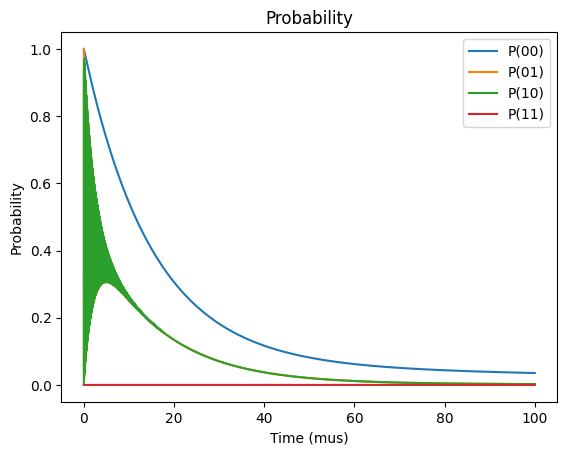

In [79]:
# Plot Results

plt.plot(tlist, 1 - result2.expect[0], label="P(00)")
plt.plot(tlist, result2.expect[1], label="P(01)")
plt.plot(tlist, result2.expect[2], label="P(10)")
plt.plot(tlist, result2.expect[3], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

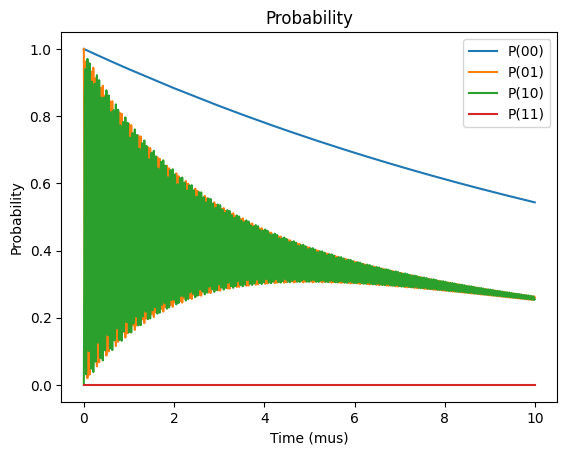

In [80]:
# Plot Results

plt.plot(tlist[:1000], 1 - result2.expect[0][:1000], label="P(00)")
plt.plot(tlist[:1000], result2.expect[1][:1000], label="P(01)")
plt.plot(tlist[:1000], result2.expect[2][:1000], label="P(10)")
plt.plot(tlist[:1000], result2.expect[3][:1000], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

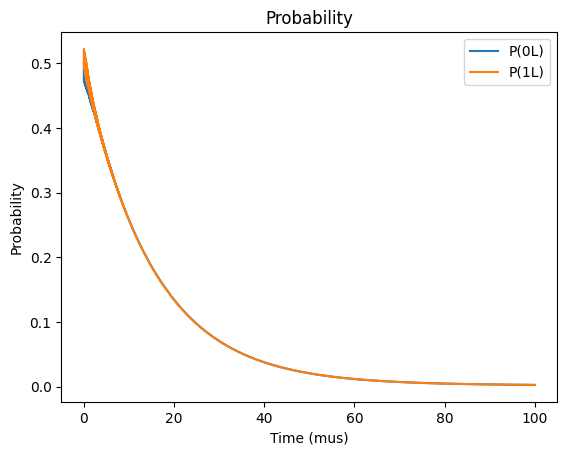

In [81]:
# Plot Results

plt.plot(tlist, result2.expect[4], label="P(0L)")
plt.plot(tlist, result2.expect[5], label="P(1L)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

In [82]:
# Simulation only T1 Process

tlist = np.linspace(0, 100, 10000)

result3 = mesolve(
    [H0],
    state01,
    tlist,
    c_ops = [np.sqrt(gamma1_1) * tensor(sm, qeye(2), qeye(2)), np.sqrt(gamma1_2) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gamma1_3) * tensor(qeye(2), sm, qeye(2))],
    e_ops = op_list,
)

Text(0, 0.5, 'Probability')

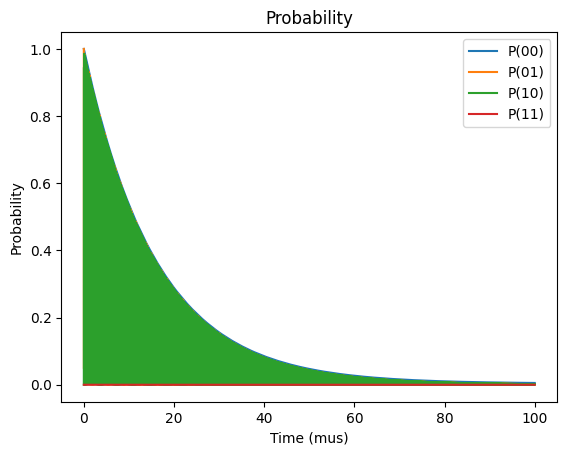

In [83]:
# Plot Results

plt.plot(tlist, 1 - result3.expect[0], label="P(00)")
plt.plot(tlist, result3.expect[1], label="P(01)")
plt.plot(tlist, result3.expect[2], label="P(10)")
plt.plot(tlist, result3.expect[3], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

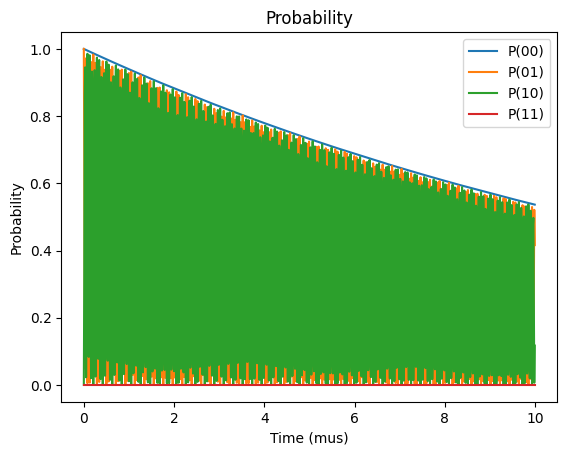

In [84]:
# Plot Results

plt.plot(tlist[:1000], 1 - result3.expect[0][:1000], label="P(00)")
plt.plot(tlist[:1000], result3.expect[1][:1000], label="P(01)")
plt.plot(tlist[:1000], result3.expect[2][:1000], label="P(10)")
plt.plot(tlist[:1000], result3.expect[3][:1000], label="P(11)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

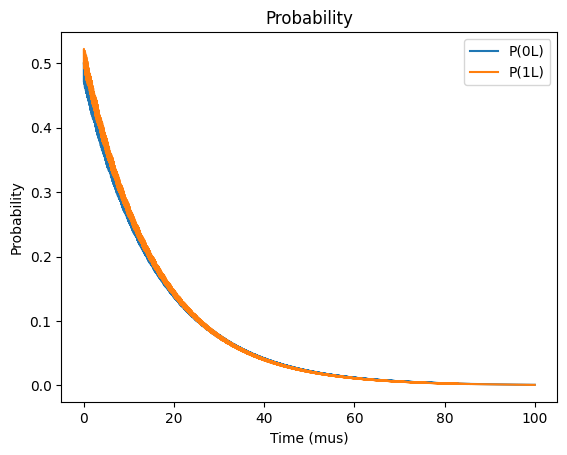

In [85]:
# Plot Results

plt.plot(tlist, result3.expect[4], label="P(0L)")
plt.plot(tlist, result3.expect[5], label="P(1L)")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (mus)')
plt.ylabel('Probability')

# Spectroscopy

In [60]:
# Simulation T1 & T2 process

tlist = np.linspace(0, 1000, 100000)

result4 = mesolve(
    [H0],
    state1L,
    tlist,
    c_ops = [np.sqrt(gamma1_1) * tensor(sm, qeye(2), qeye(2)), np.sqrt(gamma1_2) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gamma1_3) * tensor(qeye(2), sm, qeye(2)), np.sqrt(gammaphi_1) * tensor(sz, qeye(2), qeye(2)), np.sqrt(gammaphi_2/2) * tensor(qeye(2), sz, qeye(2)), np.sqrt(gammaphi_3/2) * tensor(qeye(2), qeye(2), sz)],
    e_ops = op_list,
)

Text(0, 0.5, 'Probability')

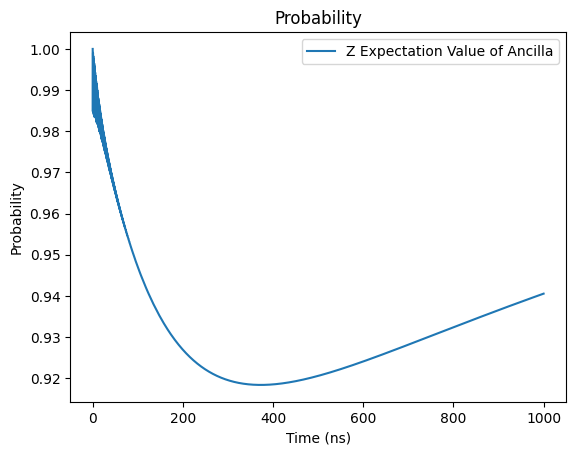

In [61]:
# Plot Results

plt.plot(tlist, result4.expect[6], label="Z Expectation Value of Ancilla")

plt.legend()
plt.title('Probability')
plt.xlabel('Time (ns)')
plt.ylabel('Probability')

Text(0, 0.5, 'FFT of signal')

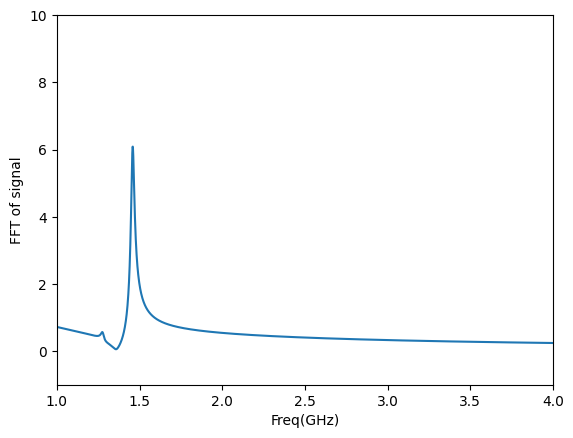

In [64]:
z_fft = np.fft.fftshift(np.fft.fft(result4.expect[6]))
z_freq = np.fft.fftshift(np.fft.fftfreq(len(result4.expect[6]), d=tlist[1]-tlist[0]))

plt.figure()
plt.plot(z_freq, np.abs(z_fft))
plt.xlim(1,4)
plt.ylim(-1,10)
plt.xlabel('Freq(GHz)')
plt.ylabel('FFT of signal')